In [3]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [5]:
df = pd.DataFrame()

In [6]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [7]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

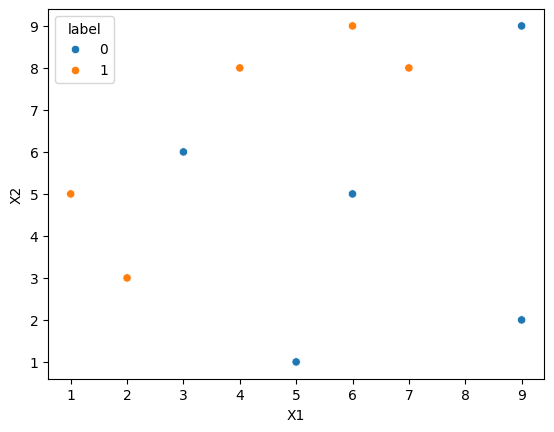

In [9]:
import seaborn as sns
sns.scatterplot(x = df['X1'],y = df['X2'], hue = df['label'])

In [10]:
df['weights'] = 1/df.shape[0]

In [11]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt1 = DecisionTreeClassifier(max_depth = 1)

In [18]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [19]:
#step 2 Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

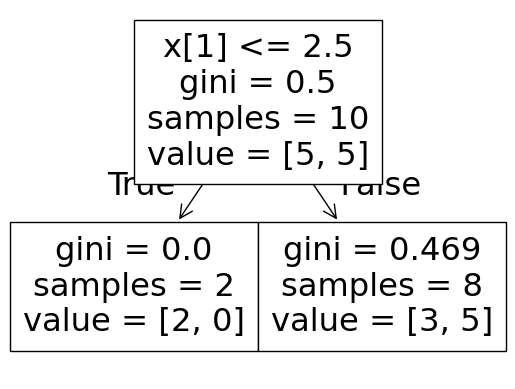

In [20]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

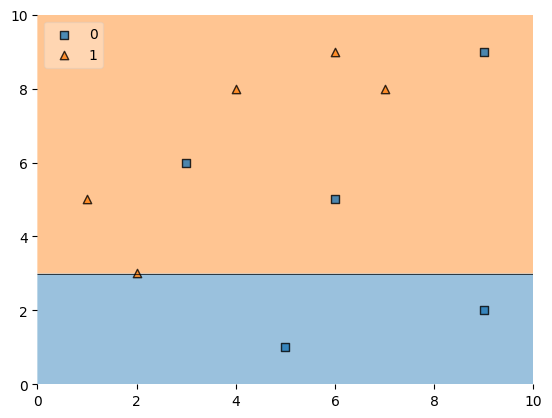

In [21]:
plot_decision_regions(X,y,clf = dt1, legend = 2)

In [23]:
df["y_pred"] = dt1.predict(X)

In [24]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [30]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [31]:
#Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [32]:
#step 4 - updaye weights
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [33]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [34]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [35]:
# always weight sum = 1
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [45]:
#df = df.rename(columns = {'normalized':'normalized_weights'})

In [48]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [51]:
#df.drop('normalized', axis =1, inplace = True)
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.166559,0.309508
3,4,8,1,0.1,1,0.065508,0.071475,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.452458
5,6,9,1,0.1,1,0.065508,0.071475,0.523933
6,6,5,0,0.1,1,0.152653,0.166559,0.690492
7,7,8,1,0.1,1,0.065508,0.071475,0.761967
8,9,9,0,0.1,1,0.152653,0.166559,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,1.000000


In [52]:
df['normalized_weights'].sum()

np.float64(1.0)

In [54]:
#creating a range
#df.drop("cumsum_upper",axis = 1, inplace =True)
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [55]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [57]:
df[['X1','X2','label','weights','y_pred','updated_weights',	'cumsum_upper',	'cumsum_lower']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,1.000000,0.928525


In [61]:
def create_new_datasets(df):
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a >row['cumsum_lower']:
                indices.append(index)
    return indices

In [63]:
# upsampling
index_values = create_new_datasets(df)
index_values

[6, 7, 2, 6, 9, 6, 8, 5, 0, 6]

In [64]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [65]:
second_df

,X1,X2,label,weights
6,6,5,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1


In [66]:
dt2 = DecisionTreeClassifier(max_depth = 1)

In [73]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.625, 0.5, '  False')]

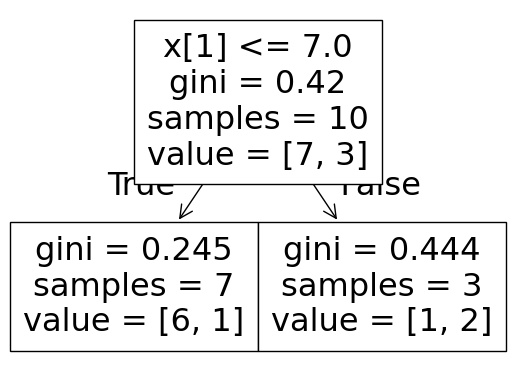

In [74]:
plot_tree(dt2)

<Axes: >

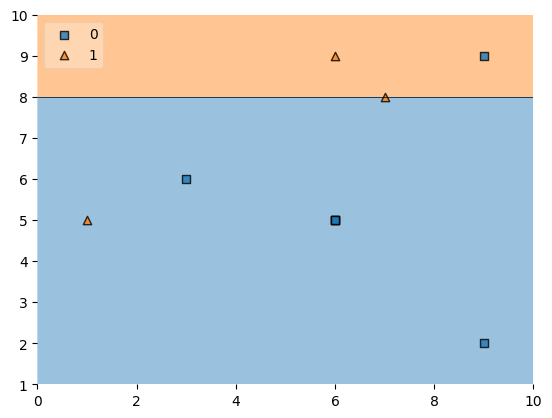

In [78]:
plot_decision_regions(x,y,clf =dt2, legend = 2)

In [80]:
second_df['y_perd'] = dt2.predict(x)

In [81]:
second_df

,X1,X2,label,weights,y_perd
6,6,5,0,0.1,0
7,7,8,1,0.1,1
2,3,6,0,0.1,0
6,6,5,0,0.1,0
9,9,2,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,1
5,6,9,1,0.1,1
0,1,5,1,0.1,0
6,6,5,0,0.1,0


In [82]:
alpha2 = calculate_model_weight(0.1)

In [84]:
alpha2

np.float64(1.0986122886681098)

In [90]:
#sep 4 - update weights
def update_row_weights(row,alpha = 1.09):
    if row['label'] == row['y_perd']:
        return row['weights']* np.exp(-alpha)

    else:
        return row['weights'] * np.exp(alpha)

In [91]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [92]:
second_df

,X1,X2,label,weights,y_perd,updated_weights
6,6,5,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,1,0.297427
5,6,9,1,0.1,1,0.033622
0,1,5,1,0.1,0,0.297427
6,6,5,0,0.1,0,0.033622


In [93]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [95]:
second_df

,X1,X2,label,weights,y_perd,updated_weights,nomalized_weights
6,6,5,0,0.1,0,0.033622,0.038922
7,7,8,1,0.1,1,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
9,9,2,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
8,9,9,0,0.1,1,0.297427,0.344313
5,6,9,1,0.1,1,0.033622,0.038922
0,1,5,1,0.1,0,0.297427,0.344313
6,6,5,0,0.1,0,0.033622,0.038922


In [96]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [97]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [98]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [100]:
second_df[['X1','X2','label','weights','y_perd','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_perd,nomalized_weights,cumsum_lower,cumsum_upper
6,6,5,0,0.1,0,0.038922,0.000000,0.038922
7,7,8,1,0.1,1,0.038922,0.038922,0.077843
2,3,6,0,0.1,0,0.038922,0.077843,0.116765
6,6,5,0,0.1,0,0.038922,0.116765,0.155687
9,9,2,0,0.1,0,0.038922,0.155687,0.194608
6,6,5,0,0.1,0,0.038922,0.194608,0.233530
8,9,9,0,0.1,1,0.344313,0.233530,0.577843
5,6,9,1,0.1,1,0.038922,0.577843,0.616765
0,1,5,1,0.1,0,0.344313,0.616765,0.961078
6,6,5,0,0.1,0,0.038922,0.961078,1.000000


In [102]:
index_values = create_new_datasets(second_df)

In [103]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [104]:
third_df

,X1,X2,label,weights
6,6,5,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
0,1,5,1,0.1
6,6,5,0,0.1


In [105]:

dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

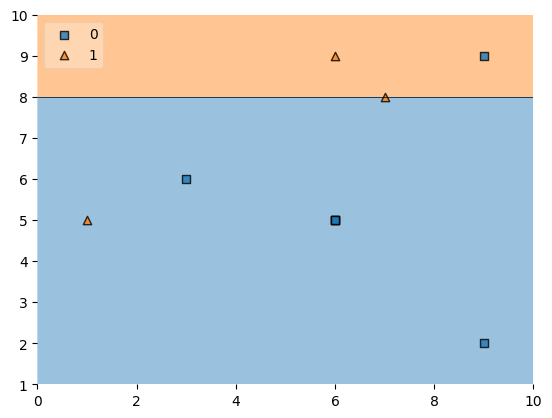

In [106]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [107]:
third_df['y_pred'] = dt3.predict(X)

In [108]:

third_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
5,6,9,1,0.1,1
0,1,5,1,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,1
0,1,5,1,0.1,0
6,6,5,0,0.1,0


In [109]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [110]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


**Predction**

In [111]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)     

array([1])

In [112]:
dt2.predict(query)

array([0])

In [113]:
dt3.predict(query)

array([0])

In [114]:
alpha1*1 + alpha2*(1) + alpha3*(1)

np.float64(1.09861228866811)

In [115]:

np.sign(1.09)

np.float64(1.0)

In [116]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [117]:
dt2.predict(query)

array([1])

In [118]:
dt3.predict(query)

array([1])

In [119]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

np.float64(-0.2513144282809062)

In [120]:
np.sign(-0.25)

np.float64(-1.0)